In [2]:
import numpy as np

In [3]:
file = open(r"C:\Users\gaoyu\Desktop\hw2\HW2_data\HW2_data\1\hw2-image.txt","r+")  
data_ls=[]
for i in file.read().split("\n")[:-1]:
    temp_ls=[]
    for j in i.split(" "):
        temp_ls.append(int(j))
    data_ls.append(temp_ls)
data=np.asarray(data_ls)

In [4]:
data[0]

array([129, 108,  61])

In [5]:
mean_init=np.array([[255,255,255],
[255,0,0],
[128,0,0],
[0,255,0],
[0,128,0],
[0,0,255],
[0,0,128],
[0,0,0]])

In [6]:
mean_init[0]

array([255, 255, 255])

In [7]:
#Euclidean distance dist 𝑥, 𝑦 = |𝑥 − 𝑦|2
#dist = numpy.linalg.norm(a-b)
#loss: sum of square distance
# k: number of clusters init:8

In [8]:
def kmeans_one_iter(data,k,mean):
    #create new clusters based on k
    cluster_ls=[]
    for clusterID in range(k):
        new_cluster=[]
        cluster_ls.append(new_cluster)
    #print(len(cluster_ls))
    
    #iterarte all data points and asiign cluster
    sum_dist=0
    for dataID in data:
        dist_ls=[]
        for meanID in mean:
            dist = np.linalg.norm(meanID-dataID)
            dist_ls.append(dist)
        sum_dist+=min(dist_ls)
        cluster_ls[np.argmin(dist_ls)].append(dataID)
    mean_ls=[]
    
    #get new means
    for clusterID in cluster_ls:
        if len(clusterID)==0:
            pass
        else:
            mean_ls.append(np.mean(np.array(clusterID),axis=0))
    mean_ls=np.array(mean_ls)
    new_k=len(mean_ls)
    
    return mean_ls,new_k,sum_dist

In [79]:
kmeans_one_iter(data,k,mean_init)

(array([[226.2480551 , 208.85269736, 194.33031501],
        [203.59562026, 135.48836631,  77.5030484 ],
        [127.34619478,  64.4117936 ,  21.9861835 ],
        [ 92.93181818,  94.45454545,  89.30113636],
        [ 56.16536313,  56.91284916,  79.27039106],
        [ 29.20886167,  23.7493684 ,  22.21048579]]), 6)

In [112]:
def kmeans(data,k,mean,num_iter):
    sum_dist_ls=[]
    for i in range(num_iter):
        mean,k,sum_dist=kmeans_one_iter(data,k,mean)
        if i%10==0:
            print("iter "+str(i)+" :")
            print("sum distance: "+str(sum_dist))
        sum_dist_ls.append(sum_dist)
    return sum_dist_ls

In [113]:
num_iter=100
k=8
loss_ls=kmeans(data,k,mean_init,num_iter)

iter 0 :
sum distance: 14442779.263655432
iter 10 :
sum distance: 4393300.281091905
iter 20 :
sum distance: 4390808.08782009
iter 30 :
sum distance: 4135941.8981629526
iter 40 :
sum distance: 4135029.136105607
iter 50 :
sum distance: 4135181.7665198944
iter 60 :
sum distance: 4135181.7665198944
iter 70 :
sum distance: 4135181.7665198944
iter 80 :
sum distance: 4135181.7665198944
iter 90 :
sum distance: 4135181.7665198944


Text(0,0.5,'loss')

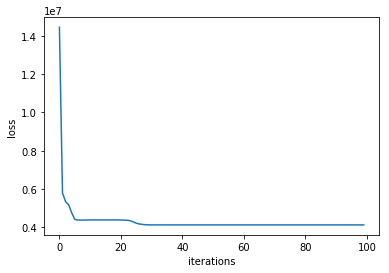

In [114]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)),loss_ls)#valia
plt.xlabel('iterations')
plt.ylabel('loss')

### final clusters (after 40 iters)

In [9]:
# when iteration=40. converges.
k=8
mean=mean_init
for i in range(40):
    mean,k,sum_dist=kmeans_one_iter(data,k,mean)

In [10]:
mean,k

(array([[241.2002838 , 238.59274275, 233.82525846],
        [194.36554622, 136.26621586,  90.86095063],
        [136.26703226,  61.08503751,  10.09412011],
        [157.23074481,  97.53891862,  51.3905924 ],
        [ 78.92800872,  37.10900263,  13.07137195],
        [ 25.97800232,  23.23575423,  23.60599063]]), 6)

In [12]:
#create new clusters based on k
cluster_ls=[]
for clusterID in range(k):
    new_cluster=[]
    cluster_ls.append(new_cluster)
#print(len(cluster_ls))

#iterarte all data points and asiign cluster
for dataID in data:
    dist_ls=[]
    for meanID in mean:
        dist = np.linalg.norm(meanID-dataID)
        dist_ls.append(dist)
    sum_dist+=min(dist_ls)
    cluster_ls[np.argmin(dist_ls)].append(dataID)

### num of pixels inside each cluster

In [13]:
for i in cluster_ls:
    print(len(i))

4932
15215
52530
22052
40366
74917


### eucliean---B

### Manhattan distance---C

### l∞ distance is A

## K-Means Advantages :

1) If variables are huge, then  K-Means most of the times computationally faster if we keep k smalls.
 K-medoids runs `O(n^2*k*i)` in time; k-means runs in `O(n*k*i)` in time.
 n stands for number of data in the cluster, k stands for number of cluster, i stands for dimension

2) K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.


## K-Means Disadvantages :

1) Difficult to predict K-Value.
2) With global cluster, it didn't work well.
3) Different initial partitions can result in different final clusters.
4) It does not work well with clusters (in the original data) of Different size and Different densit
3) sensitive to outliers
## K-Medoi Advantages :
1)  K-medoids have more interpretability if we want to pick a representation. however, k-mean cannot visualize.
2) less sensitive to outliers or noise.
3) selects the most centered member belonging to the cluster.
4)for k-means, the distance measure must be consistent with the __mean__, otherwise, it may fail to converge.
    however, for k-medoids can use any kinds of measurement.

## K-Medoi Disadvantages :
1) requires precision and is complex enough.
